In [8]:
from gates_batch import *
from states import *
from measurements_batch import *
from utils import *
import matplotlib.pyplot as plt

In [9]:
n = 100

In [10]:
state = np.array([0.17,-0.56j,-0.73,0.35j])
state = state.reshape(4,1)
rho = np.kron(state,state.conj().T)

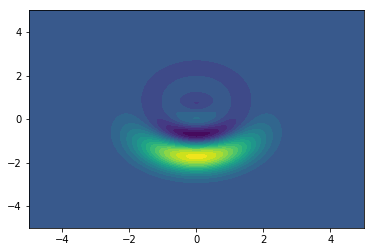

In [11]:
xvec = np.linspace(-5,5,200)
W = wigner_iterative(rho, xvec, xvec)
cont0 = plt.contourf(xvec, xvec, W, 20)
plt.show()

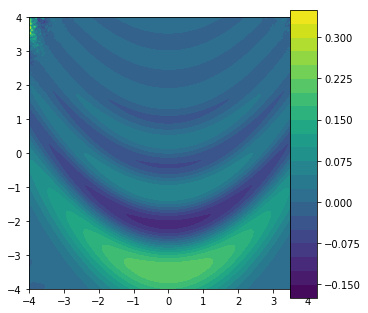

In [12]:
init_state = np.zeros((1, n))
init_state[:,0] = 1.
gate0 = F_gate(1, n)
gate1 = S_gate(np.array([1.35]), np.array([0.]), n) # squeezing
gate2 = V_gate(np.array([0.1]), n)   # cubic gate
state = np.einsum('ijk,ik->ij', gate1, init_state)
# state = init_state
state = np.einsum('ijk,ik->ij', gate0, state)
state = np.einsum('ijk,ik->ij', gate2, state)
state = state.reshape(n,1)
rho = np.kron(state,state.conj().T)
plt.figure(figsize=[5,5])
xvec = np.linspace(-4, 4, 200)
yvec = np.linspace(-0, 4, 200)
W = wigner_iterative(rho, xvec, yvec)
cont0 = plt.contourf(xvec, xvec, W, 20)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [13]:
a = np.zeros((10, 10, 10))

In [14]:
from scipy.linalg import expm
print(expm(0.5j*a[0]))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [15]:
%%time
n = 50
init_state = np.zeros((10, n))
init_state[:,0] = 1.
gate0 = P_gate(10, n)
state = np.einsum('ijk,ik->ij', gate0, init_state)

CPU times: user 162 ms, sys: 127 ms, total: 289 ms
Wall time: 39.9 ms


In [16]:
%%time
n = 50
meas_X_theta(state, 0, n)

CPU times: user 2.74 s, sys: 722 ms, total: 3.46 s
Wall time: 2.27 s


(array([1.1600e+02, 6.8000e+01, 4.7000e+01, 4.9000e+01, 2.8900e+02,
        9.2520e+03, 2.6876e+04, 4.3617e+04, 6.1071e+04, 5.8615e+04]),
 array([-14.512, -11.584,  -8.656,  -5.728,  -2.8  ,   0.128,   3.056,
          5.984,   8.912,  11.84 ,  14.768]),
 <a list of 10 Patch objects>)

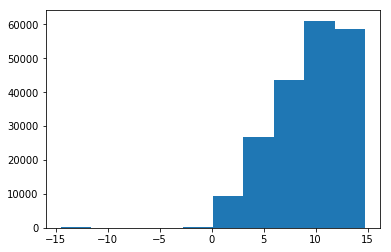

In [17]:
plt.hist(meas_X_theta(state, 0, n)[0])

In [18]:
%%time
probs = np.zeros((10,10))
probs[:,1] = 1.
x = [1,2,3,4,5,6,7,8,9,10]
data = np.random.choice(x, size=100000, p=probs[1,:])

CPU times: user 2.54 ms, sys: 7.6 ms, total: 10.1 ms
Wall time: 3.13 ms


In [19]:
%%time
def myfunc(a, b):
...     "Return a-b if a>b, otherwise return a+b"
...     if a > b:
...         return a - b
...     else:
...         return a + b
vfunc = np.vectorize(myfunc)
vfunc([1, 2, 3, 4], [2,3,4,5])

CPU times: user 142 µs, sys: 39 µs, total: 181 µs
Wall time: 190 µs


In [20]:
from scipy.linalg import expm
def func(a):
    return expm(a)

In [21]:
vfunc = np.vectorize(func)

# Testing Measurements